# Decission trees hand-in

Import libraries and functions

In [1]:
import sys
from io import StringIO
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

Load dataset

In [2]:
dataset_path = 'data/Aleph_dataset.csv'
data = pd.read_csv(dataset_path, index_col = 0)

data.head()

,energy,cTheta,phi,prob_b,spheri,pt2rel,multip,bqvjet,ptlrel,isb
0,46.8299,0.3871,0.8528,0.0327,0.2105,0.0302,0.4776,0.0314,-0.0003,0.0
1,45.6397,-0.3943,-2.2817,0.0035,0.3457,0.0314,0.3497,0.0106,-0.0003,0.0
2,48.8960,-0.4613,-0.6139,0.0649,0.0872,0.0254,0.1288,0.1074,-0.0003,0.0
3,39.1577,0.4668,2.4818,0.0027,0.1570,0.0147,0.2732,0.2117,0.0240,0.0
4,43.7354,-0.7642,1.7872,0.4320,0.4873,0.0505,0.3536,0.4578,-0.0003,1.0


## Classification task

Train a tree classifier to classify the results from electron-positron collisions into b-quarks and non b-quarks —don’t panic if you don’t know what this means, just think of two categories 0 and 1. In other words, train a decision tree that acts as function mapping a set of input features X to an output Y which represents a binary category.

The column *isb* is the category we want to predict: 0 if it's not a b-quark and 1 if it is a b-quark. Therefore we need to split the loaded data into the rest of feature variables and that column.

In [3]:
feature_columns = data.columns
input_variables = data.columns[feature_columns != 'isb']
input_data      = data[input_variables]
truth           = data['isb']
print(input_variables)

Index(['energy', 'cTheta', 'phi', 'prob_b', 'spheri', 'pt2rel', 'multip',
       'bqvjet', 'ptlrel'],
      dtype='object')


Let's check the data that we are going to feed the tree model to predict the categories:

In [4]:
input_data.head()

,energy,cTheta,phi,prob_b,spheri,pt2rel,multip,bqvjet,ptlrel
0,46.8299,0.3871,0.8528,0.0327,0.2105,0.0302,0.4776,0.0314,-0.0003
1,45.6397,-0.3943,-2.2817,0.0035,0.3457,0.0314,0.3497,0.0106,-0.0003
2,48.8960,-0.4613,-0.6139,0.0649,0.0872,0.0254,0.1288,0.1074,-0.0003
3,39.1577,0.4668,2.4818,0.0027,0.1570,0.0147,0.2732,0.2117,0.0240
4,43.7354,-0.7642,1.7872,0.4320,0.4873,0.0505,0.3536,0.4578,-0.0003


Let us now divide the truth and input_data into two parts; a training sample and a validation sample:

In [5]:
input_train, input_validation, truth_train, truth_validation = train_test_split(input_data, truth, test_size=0.2)

### Hand-in tasks:

1. Define a model `DecisionTreeClassifier`
2. Fit it the data
3. For the trained model, print the model prediction score on the validation split 
4. Display importance of each input feature to the predictions using `feature_importances_`  attribute
5. Plot the decission surface over the top two features
6. Generate the confusion matrix, ROC curve and AUC value of the trained model using `sklearn.metrics.confusion_matrix`, `sklearn.metrics.roc_curve` and `sklearn.metrics.auc`
7. Try to improve the performance of the model by choosing differnt model parameters.
8. *Bonus* : Explore how the model parameters `max_depth`  and `min_samples_leaf` affects the overfitting of the model.
9. *Bonus* : Display the decision `tree.plot_tree(model, max_depth=2)` up to sensible depth and inspect it

Validation score: 0.8475125110391521
Feature importances: [0.06640489 0.05688759 0.0492737  0.50079285 0.06185076 0.05852327
 0.05685224 0.10599946 0.04341524]


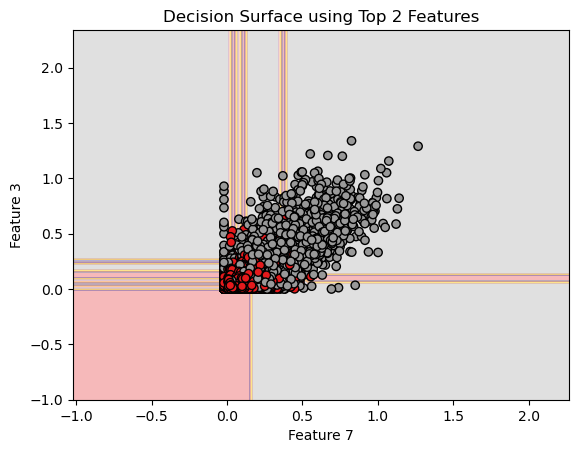

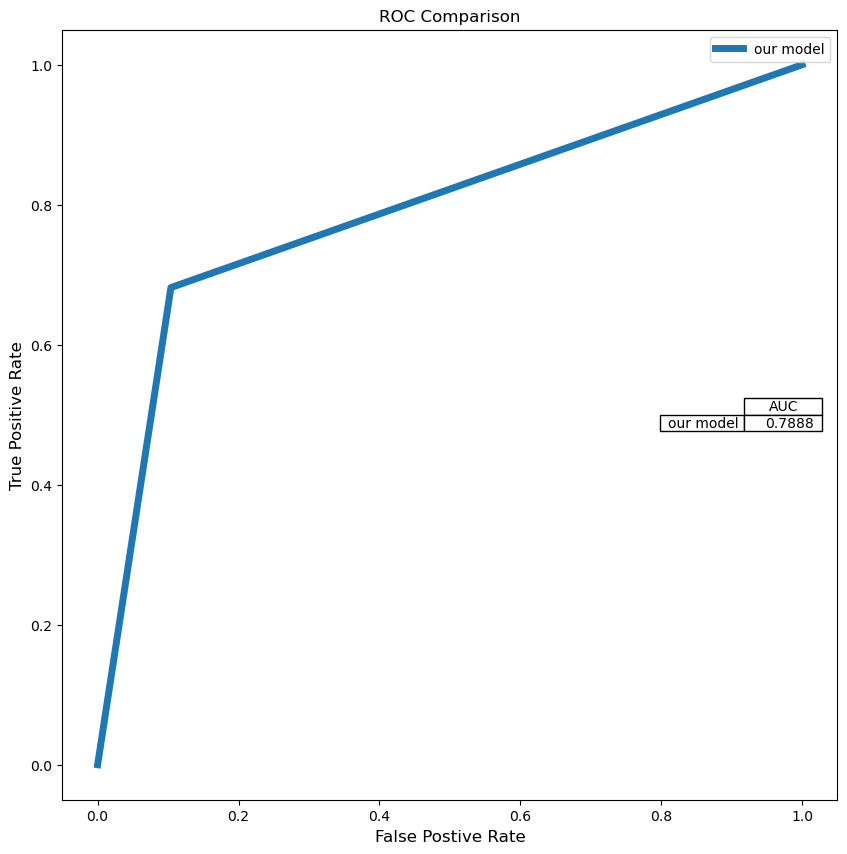

In [16]:
# Step 1: Define the model
model = DecisionTreeClassifier()

# Step 2: Fit the model
model.fit(input_train, truth_train)

# Step 3: Print accuracy on validation set
print("Validation score:", model.score(input_validation, truth_validation))

# Step 4: Print feature importances
print("Feature importances:", model.feature_importances_)

# Step 5: Plot decision surface using top 2 features
# -----------------------------------------------
# Get top 2 most important feature indices
top2_indices = np.argsort(model.feature_importances_)[-2:]

# Slice top 2 features using .iloc
X_train_top2 = input_train.iloc[:, top2_indices]

# Train a new model on only the top 2 features
model_top2 = DecisionTreeClassifier()
model_top2.fit(X_train_top2, truth_train)

# Plot decision boundary
disp = sk.inspection.DecisionBoundaryDisplay.from_estimator(
    model_top2, X_train_top2, response_method="predict", cmap=plt.cm.Set1, alpha=0.3
)

# Plot validation points
xval1 = X_train_top2.iloc[:, 0]
xval2 = X_train_top2.iloc[:, 1]
disp.ax_.scatter(xval1, xval2, c=truth_train, edgecolor='k', cmap=plt.cm.Set1)
disp.ax_.set_xlabel(f"Feature {top2_indices[0]}")
disp.ax_.set_ylabel(f"Feature {top2_indices[1]}")
disp.ax_.set_title("Decision Surface using Top 2 Features")
plt.show()

## Step 6:
predictionsValidation = model.predict(input_validation)
fpr, tpr, _ = roc_curve(truth_validation, predictionsValidation)
fig = plt.figure(figsize = [10,10])
plt.title('ROC Comparison', size = 12)
plt.plot(fpr,tpr, label = 'our model', linewidth=5)
plt.legend()
plt.xlabel('False Postive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)


auc_score = auc(fpr,tpr) 
row_labels=['our model']
table_vals=[[round(auc_score,5)]]
col_labels=['AUC']
the_table = plt.table(cellText=table_vals,
            colWidths = [0.1]*3,
            rowLabels=row_labels,
            colLabels=col_labels,
            loc='center right')

## Step 7:

## Regression task

The goal of the regression task is to predict the energy of each particles collision based on the variables.

### Hand-in tasks:

1. Define a regression tree model using `DecisionTreeRegressor` and fit it to predict the energy of the collions
3. For the trained model, visualise the model predictions vs the real values and print the obtained loss
4. Report importance of each feature using `feature_importances_`  attribute  
5. Evaluate your model on a loop for different max_depths and figure out what's the optimal depth to obtained the best accuracy on the validation data.
6. Do a sanity-check of your model by train a regression with very high depth and evaluate it on the training dataset split: you should obtained a score of 1.0 and see a perfectly diagonal line when ploting real values vs predictions.
7. *Bonus*: Try to improve the performance of the model on the validation split by choosing different model parameters (if you're familiar with it, feel free to use k-fold Cross-Validation)
8. *Bonus*: Predict two any features —e.g. energy and another one— based on the rest. [Here you can find an example of Multi-output ree regression](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html#sphx-glr-auto-examples-tree-plot-tree-regression-multioutput-py).

In [59]:
dataset_path = 'data/AlephB_LEP_dataset_v2.csv'
data = pd.DataFrame(np.genfromtxt(dataset_path, names=True))

data.head()

,energy,cTheta,phi,prob_b,spheri,pt2rel,multip,bqvjet,ptlrel,nnbjet,isb
0,46.8299,0.3871,0.8528,0.0327,0.2105,0.0302,0.4776,0.0314,-0.0003,0.1642,0.0
1,45.6397,-0.3943,-2.2817,0.0035,0.3457,0.0314,0.3497,0.0106,-0.0003,0.1055,0.0
2,48.8960,-0.4613,-0.6139,0.0649,0.0872,0.0254,0.1288,0.1074,-0.0003,0.1183,0.0
3,39.1577,0.4668,2.4818,0.0027,0.1570,0.0147,0.2732,0.2117,0.0240,0.1612,0.0
4,43.7354,-0.7642,1.7872,0.4320,0.4873,0.0505,0.3536,0.4578,-0.0003,0.9969,1.0


In [62]:
label_cols = ["energy"]
labels = data[label_cols]

feature_cols = data.columns[(data.columns != 'energy')]

X = data[feature_cols]
X.head()

X_train, X_val, y_train, y_val = train_test_split(X, labels, test_size=0.25)


### 1. Train the model

In [ ]:
## Your code here

model = sk.tree.DecisionTreeRegressor(random_state=0, max_depth=40, criterion="squared_error").fit(X_train, y_train)
print(f"Trained tree has a depth of {model.get_depth()} and {model.get_n_leaves()} leaves.") 


Trained tree has a depth of 40 and 25102 leaves.


### 2. Visualize the prediction 

[34.8486 48.3528 47.3854 ... 48.1208 18.2437 27.1336]
6.659676254906704
8.783050818437278


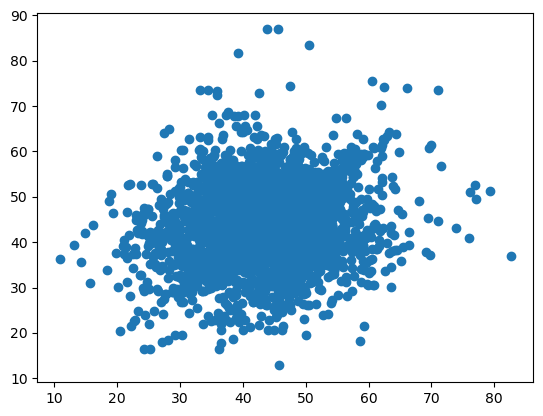

In [82]:
predictions = model.predict(X_val)

print(predictions)

print(np.mean(abs(np.array(y_val) - predictions)))
print(np.std(np.array(y_val) - predictions))

plt.plot(np.array(y_val), predictions, 'o')

### 3. Report the importance of each feature

In [83]:
print(model.feature_importances_)

[0.06564304 0.05424367 0.04377505 0.06264282 0.13525032 0.44132393
 0.05392484 0.0697055  0.04100487 0.03248597]


### 4. Evaluate model based on different max depths

Best error 3.1414608532720933
Best depth 36


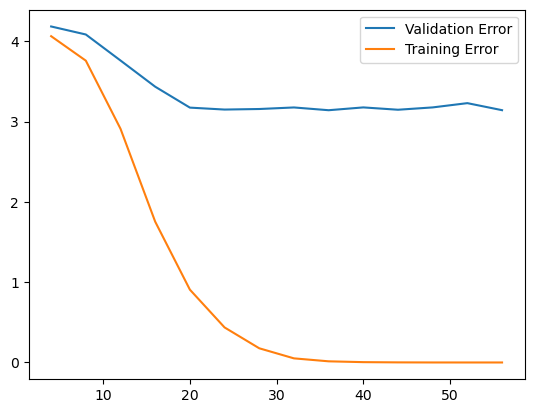

In [ ]:
max_depths = [i*4 for i in range(1,15)]

train_errors = []
eval_errors = []

best_model = None
best_depth = None
best_error = None

for max_depth in max_depths:
    model = sk.tree.DecisionTreeRegressor(random_state=0, max_depth=max_depth, criterion="squared_error").fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    eval_pred = model.predict(X_val)

    train_err = sk.metrics.mean_absolute_error(y_train, train_pred)
    eval_err = sk.metrics.mean_absolute_error(y_val, eval_pred)

    train_errors.append(train_err)
    eval_errors.append(eval_err)

    if best_error == None or best_error > eval_err:
        best_model = model
        best_error = eval_err
        best_depth = max_depth


plt.plot(max_depths, eval_errors, label='Validation Error')
plt.plot(max_depths, train_errors, label='Training Error')
plt.legend()

print(f"Best error {best_error}")
print(f"Best depth {best_depth}")


    

    

### 5. Do a sanity check with a very high `max_depth`

In [ ]:
model = sk.tree.DecisionTreeRegressor(random_state=0, max_depth=9).fit(X_train, y_train)
    
score = model.score(X_val, y_val)
print(f"r2: {score}")


r2: 0.12475741587499856


I have not been able to make the model have a score of 1. 